<a href="https://colab.research.google.com/github/FaisalAlShaer/AIDL_assignment/blob/main/20f20646Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train20f20646ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Eso\Documents\pizza\train", #Added a dictionary that will take me to the training set for pizza
    labels='inferred', 
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  
)

Found 1600 files belonging to 2 classes.


In [ ]:
validation20f20646ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Eso\Documents\pizza\test", #Added the location of testing files images
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 366 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train20f20646ds = train20f20646ds.map(process) 
validation20f20646ds = validation20f20646ds.map(process)


In [ ]:
#Defining the model architecture
model = Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [ ]:
history = model.fit(train20f20646ds,epochs=10,validation_data=validation20f20646ds)

Epoch 1/10
50/50 [==============================] - 43s 840ms/step - loss: 0.6902 - accuracy: 0.5900 - val_loss: 0.7081 - val_accuracy: 0.5301
Epoch 2/10
50/50 [==============================] - 42s 832ms/step - loss: 0.6445 - accuracy: 0.6413 - val_loss: 0.6090 - val_accuracy: 0.6967
Epoch 3/10
50/50 [==============================] - 42s 836ms/step - loss: 0.5701 - accuracy: 0.7119 - val_loss: 0.5624 - val_accuracy: 0.7432
Epoch 4/10
50/50 [==============================] - 43s 845ms/step - loss: 0.5166 - accuracy: 0.7519 - val_loss: 0.5354 - val_accuracy: 0.7678
Epoch 5/10
50/50 [==============================] - 42s 830ms/step - loss: 0.4673 - accuracy: 0.7794 - val_loss: 0.5156 - val_accuracy: 0.7568
Epoch 6/10
50/50 [==============================] - 43s 845ms/step - loss: 0.3911 - accuracy: 0.8300 - val_loss: 0.5949 - val_accuracy: 0.7514
Epoch 7/10
50/50 [==============================] - 41s 816ms/step - loss: 0.2874 - accuracy: 0.8800 - val_loss: 0.7946 - val_accuracy: 0.7077

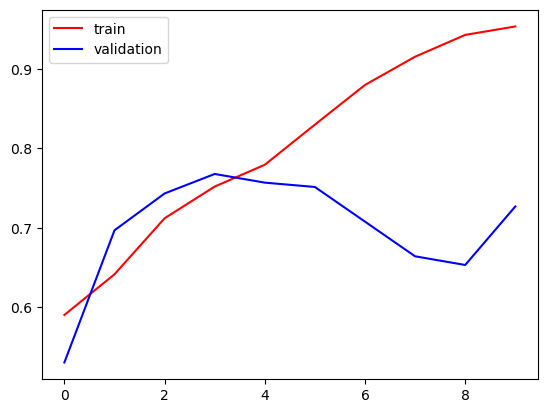

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

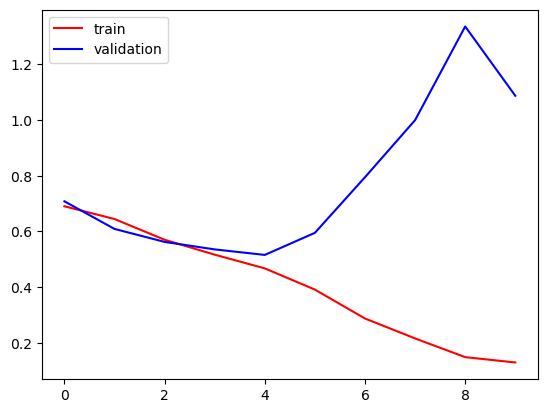

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 128ms/step


array([[1.]], dtype=float32)

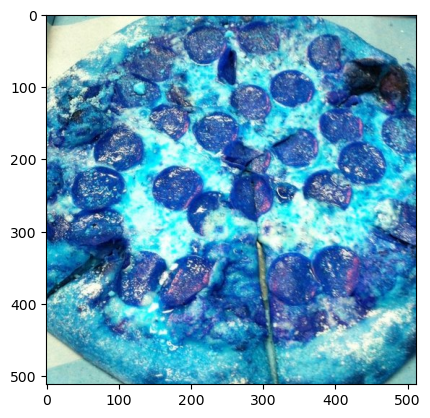

In [ ]:
import cv2  # open cv library

test_img = cv2.imread(r'C:\Users\Eso\Documents\pizza\test\pizza\3049449.jpg')

plt.imshow(test_img)

test_img.shape

test_img = cv2.resize(test_img,(256,256))  #size 256 * 256

test_input = test_img.reshape((1,256,256,3)) 
model.predict(test_input)  # 0 referes to pizza and 1 referes to not-pizza

1/1 [==============================] - 0s 24ms/step


array([[0.]], dtype=float32)

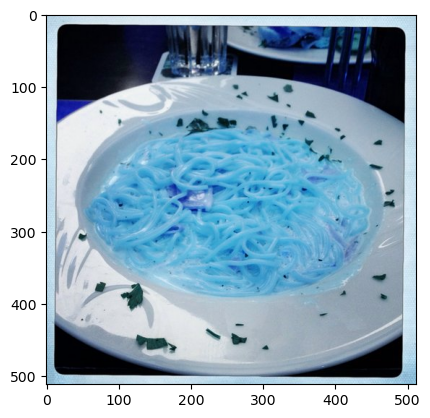

In [ ]:
test_img2 = cv2.imread(r'C:\Users\Eso\Documents\pizza\test\not_pizza\3621162.jpg')

plt.imshow(test_img2)

test_img2= cv2.resize(test_img2,(256,256))  

test_input = test_img2.reshape((1,256,256,3))  

model.predict(test_input)  #0 means pizza and 1 means not-pizza